# Introductory Matters:

Here in this notebook we're going to do a little bit of work with the JSTOR Constellate [data builder](https://constellate.org/builder). I started by searching "free speech" and "First Amendment" as keywords, grabbing all the "full text" document types within the "Law" category. Constellate also has a nice feature that gives assigns a "Dataset ID" to each of the datasets one builds. The one for this project is "b7adbb84-6bec-549e-83bb-11aeb045e5f9". 

## Getting our Libraries Imported

In [1]:
import gzip
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import circlify

c:\Users\KSpicer\Anaconda3\envs\victorian_authorship_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading the Data:

I simply downloaded the build dataset to my local machine (other options for loading the dataset are available [here](https://constellate.org/tutorials/exploring-metadata)—the downloaded  file comes as a `.gz` file, so we need to open that up with the handy [`gzip` library](https://docs.python.org/3/library/gzip.html). We want to do a little bit of work with [`pandas`](https://pandas.pydata.org/docs/) here (we could work, of course, just with the standard `json` library, but we're going to want to do some manipulation on the data and pandas is perfecty suited for that). So let's get the file opened and into a DataFrame:

In [2]:
df = pd.read_json(gzip.open('law_full.jsonl.gz'), lines=True)

Initial inspection of the dataframe:

In [3]:
df.head()

,creator,datePublished,docSubType,docType,fullText,id,identifier,isPartOf,issueNumber,language,...,wordCount,unigramCount,bigramCount,trigramCount,abstract,collection,editor,hasPartTitle,keyphrase,subTitle
0,[Thomas Reed Powell],1922-01-01,research-article,article,"[MICHIGAN LAW REVIEW VOL. XX JANUARY, 1922 No....",http://www.jstor.org/stable/1277162,"[{'name': 'issn', 'value': '00262234'}, {'name...",Michigan Law Review,3.0,[eng],...,11348,"{'denied.': 1, 'opposing': 3, 'take': 5, 'retr...","{'basis of': 1, 'in 69': 2, 'once the': 1, 'in...","{'manufacturing or domestic': 1, 'Prices of Co...",NaN,NaN,NaN,NaN,NaN,NaN
1,"[Elizabeth Goitein, Faiza Patel]",2020-10-22,NaN,report,[TRANSITION 2020–2021 A Presidential Agenda fo...,http://www.jstor.org/stable/resrep28426,"[{'name': 'local_uuid', 'value': '3dbcbae0-0d2...",NaN,NaN,[eng],...,13697,"{'MacArthur': 1, 'secrecy,': 1, 'com/infectiou...","{'that individuals': 1, 'for FY': 1, 'end, the...","{'Amendment, and the': 1, '10 values of': 1, '...",American democracy urgently needs renewal. In ...,[Research Reports],NaN,NaN,NaN,NaN
2,[H. R. M.],1922-09-01,research-article,article,[512 10 CALIFORNIA LAW REVIEW CRIMINAL LAW: CR...,http://www.jstor.org/stable/3474218,"[{'name': 'issn', 'value': '00081221'}, {'name...",California Law Review,6.0,[eng],...,4012,"{'acts.': 2, 'stolen.': 1, '45': 1, 'proponent...","{'in Abrams': 1, 'tendencies. According': 1, '...","{'check is necessary': 1, 'opposition to organ...",NaN,NaN,NaN,NaN,NaN,NaN
3,"[Alex Molnar, Faith Boninger, Gary Wilkinson, ...",2010-12-02,NaN,report,[EFFECTIVELY EMBEDDED SCHOOLS AND THE MACHINER...,http://www.jstor.org/stable/resrep42044,"[{'name': 'local_uuid', 'value': '4df59bdd-9e8...",NaN,NaN,[eng],...,16250,"{'Modern': 1, 'contests,': 2, 'fact,': 4, 'Che...","{'and Faith': 2, 'Michelle Obama': 1, '(Contin...","{'(2009). Age of': 1, 'In modern society,': 1,...",In the context of the last two years’ recessio...,[Research Reports],[Kevin Welner],NaN,NaN,NaN
4,[Thomas Raeburn White],1904-01-01,research-article,article,[THE AMERICAN LAW REGISTER FOUNDED 1852 UNIVER...,http://www.jstor.org/stable/3306378,"[{'name': 'issn', 'value': '15583562'}, {'name...",The American Law Register (1898-1907),1.0,[eng],...,7567,"{'contrary,': 1, 'scandalous': 1, 'thought': 4...","{'supposition is': 1, 'publications, however':...","{'believing in the': 1, 'the institution of': ...",NaN,NaN,NaN,NaN,NaN,NaN


So we have a dataframe with 33 different columns, we can get a full list of column names:

In [20]:
df.columns

Index(['words', 'counts'], dtype='object')

In [5]:
df['fullText'].head()

0    [MICHIGAN LAW REVIEW VOL. XX JANUARY, 1922 No....
1    [TRANSITION 2020–2021 A Presidential Agenda fo...
2    [512 10 CALIFORNIA LAW REVIEW CRIMINAL LAW: CR...
3    [EFFECTIVELY EMBEDDED SCHOOLS AND THE MACHINER...
4    [THE AMERICAN LAW REGISTER FOUNDED 1852 UNIVER...
Name: fullText, dtype: object

In [6]:
def sort_a_dictionary_by_values(dictionary):
    sorted_dict = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)
    return(sorted_dict)

In [7]:
df['sorted_unigram_dict'] = df['unigramCount'].apply(sort_a_dictionary_by_values)

In [8]:
columns = ['unigramCount', 'bigramCount', 'trigramCount']
for column in columns:
    df[f"sorted_{column}_dict"] = df[column].apply(sort_a_dictionary_by_values)

In [9]:
df.columns

Index(['creator', 'datePublished', 'docSubType', 'docType', 'fullText', 'id',
       'identifier', 'isPartOf', 'issueNumber', 'language', 'outputFormat',
       'pageCount', 'pageEnd', 'pageStart', 'pagination', 'provider',
       'publicationYear', 'publisher', 'sourceCategory', 'tdmCategory',
       'title', 'url', 'volumeNumber', 'wordCount', 'unigramCount',
       'bigramCount', 'trigramCount', 'abstract', 'collection', 'editor',
       'hasPartTitle', 'keyphrase', 'subTitle', 'sorted_unigram_dict',
       'sorted_unigramCount_dict', 'sorted_bigramCount_dict',
       'sorted_trigramCount_dict'],
      dtype='object')

In [10]:
df2 = df.sort_values(by='wordCount', ascending=False).reset_index()
print(df2['wordCount'].head())
print(df2.iloc[0])

0    188662
1     87918
2     72113
3     58842
4     53578
Name: wordCount, dtype: int64
index                                                                      52
creator                     [JEFFREY A. ROCKWELL, BRYAN D. WATSON, JENNY A...
datePublished                                                      2019-01-01
docSubType                                                                NaN
docType                                                                report
fullText                    [8 CHAPTER EIGHT: PERSONNEL ISSUES – FAMILY AN...
id                                    http://www.jstor.org/stable/resrep19548
identifier                  [{'name': 'local_uuid', 'value': '06011b49-147...
isPartOf                                                                  NaN
issueNumber                                                               NaN
language                                                                [eng]
outputFormat                             [unigram, b

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_word_cloud(dict_values):

    wordcloud = WordCloud(width=1000, height=600, max_words=100, random_state=1, background_color='gray', colormap='plasma', collocations=False, stopwords=STOPWORDS).generate_from_frequencies(dict_values)
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

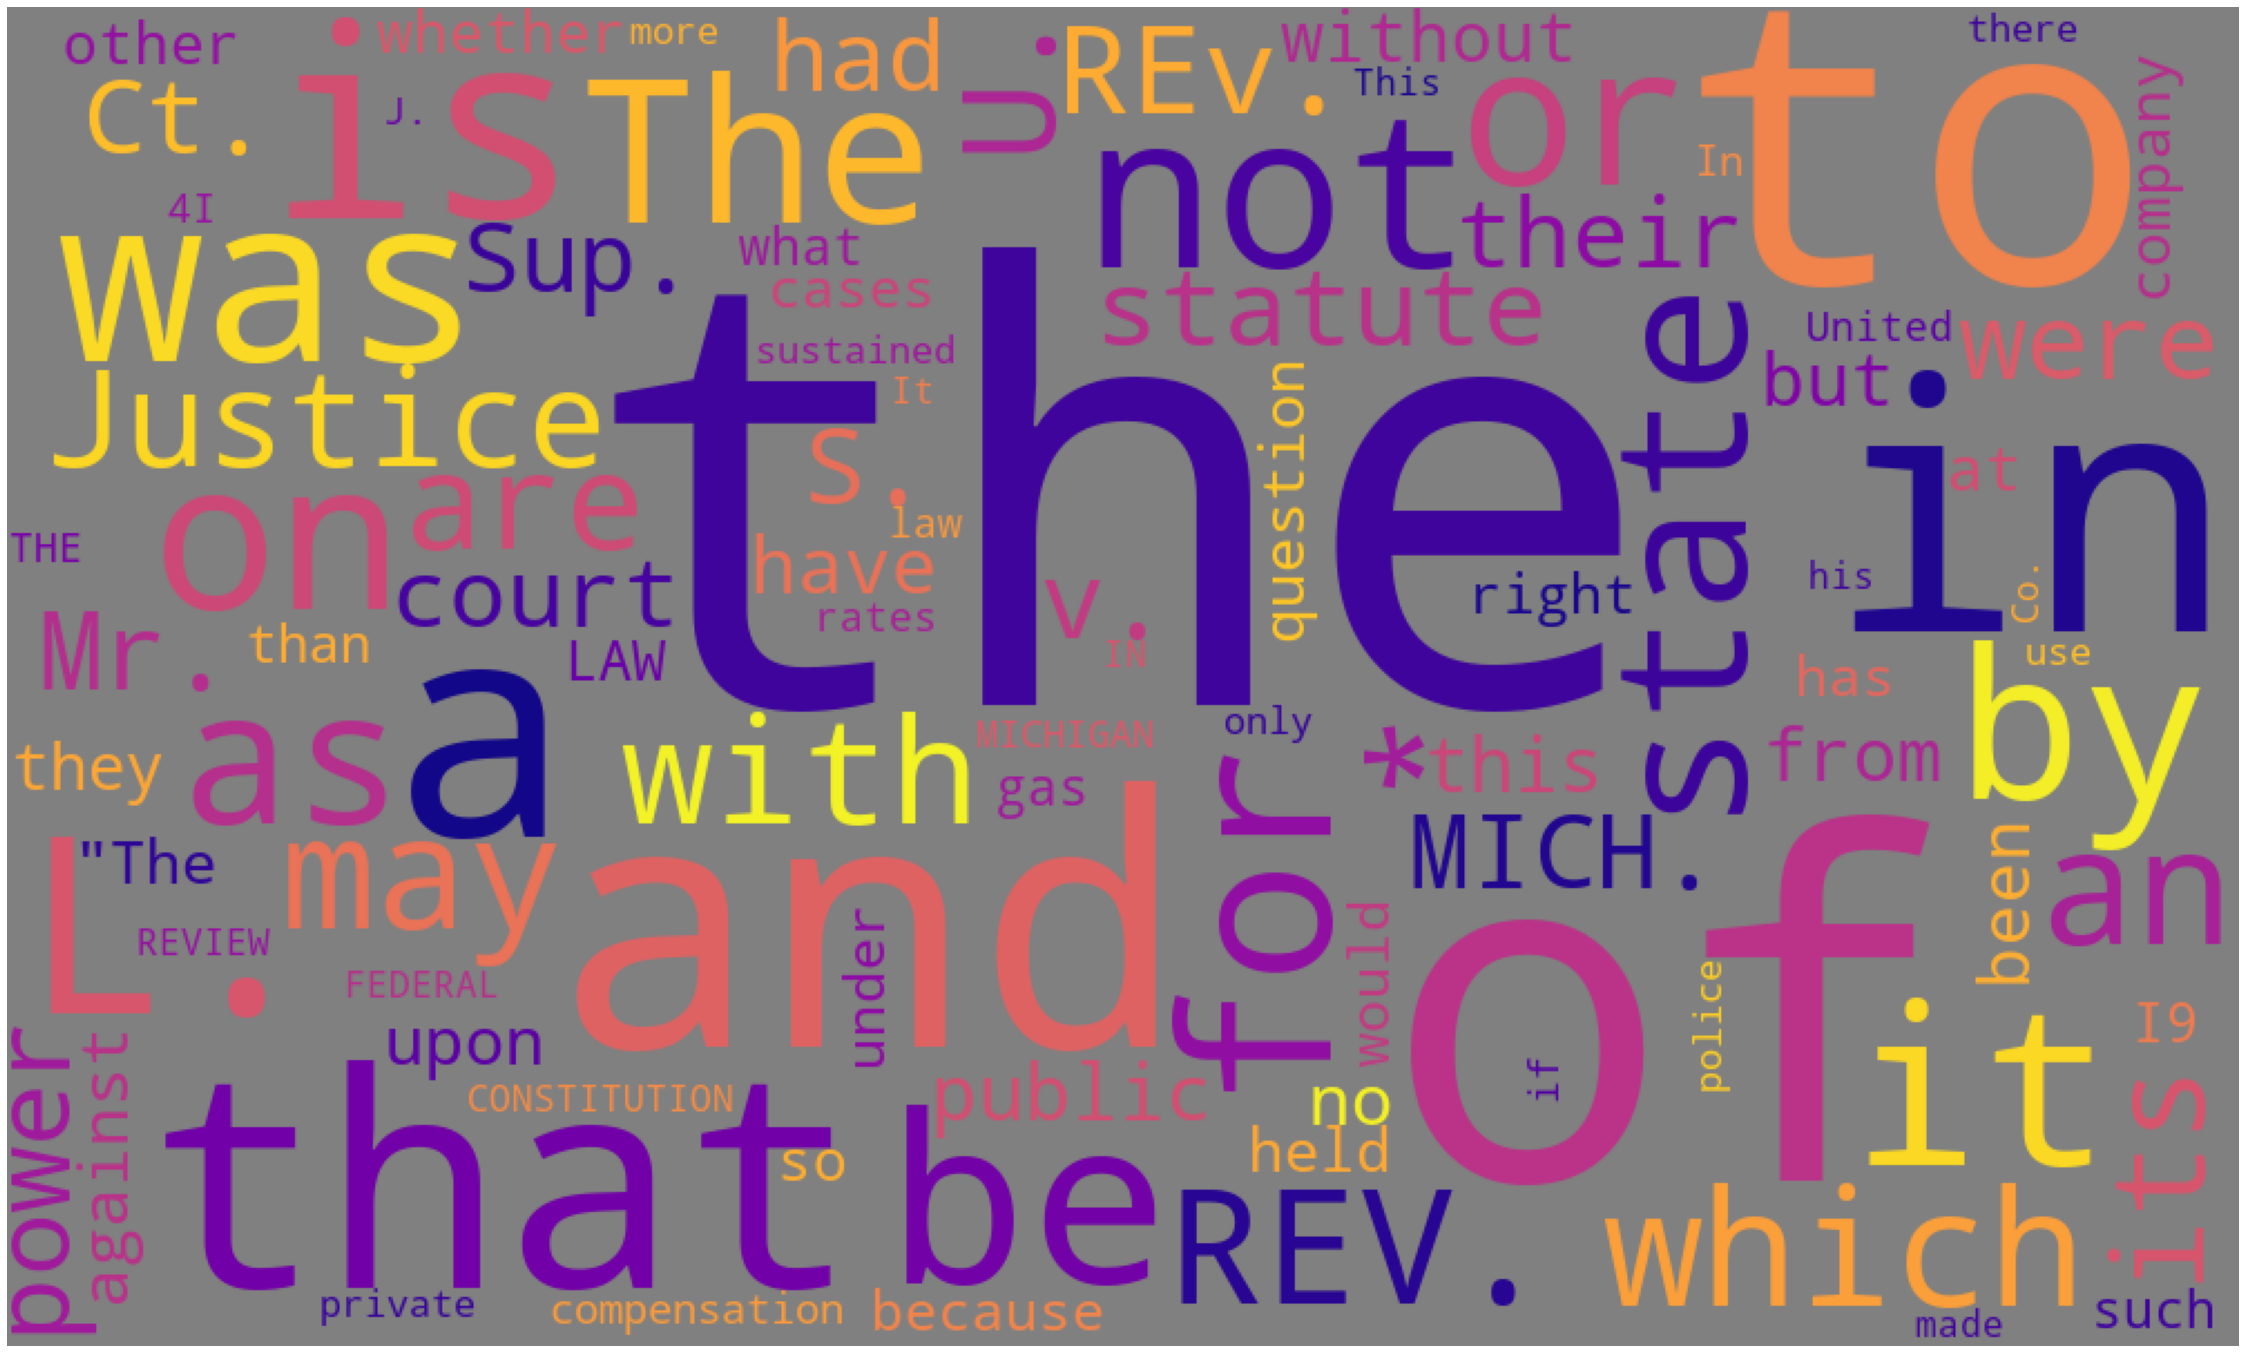

In [12]:
generate_word_cloud(df['unigramCount'].iloc[0])

In [13]:
import numpy as np
import seaborn as sns

stop_words = set(STOPWORDS)

def create_df(input):
    list_words = input.split(' ')
    set_words_full = list(set(list_words))

    set_words = [i for i in set_words_full if i not in stop_words]
    count_words = [list_words.count(i) for i in set_words]

    df = pd.DataFrame(zip(set_words, count_words), columns=['words', 'count'])
    df.sort_values('count', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [14]:
def get_color_dict(palette, number, start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d

In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df_of_interest = df.iloc[0]
print(df_of_interest)

creator                     [Thomas Reed Powell]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

C:\Users\KSpicer\AppData\Local\Temp\ipykernel_21072\3276118266.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [16]:
full_text_of_interest = df_of_interest['fullText']
full_string = " ".join(full_text_of_interest)
print(full_string)

MICHIGAN LAW REVIEW VOL. XX JANUARY, 1922 No. 3 THE SUPREME COURT'S CONSTRUCTION OF THE FEDERAL CONSTITUTION IN I920-I92I, III1 IV. PoLIcE POWER THE difficulty of classifying cases on the police power has not evaporated since the review of decisions for the preceding year. The headings there suggested are used here. Classification on the basis of the objects of the legislation appears too precarious to be attempted with any confidence. It seems safer to work along the line of the subject matters with which the legislation deals. Certain topics are species of a wider genus, and thus the same case may be put in two or more groups. Readers who are dissatisfied with the classification adopted may be assured of the sympathy of the perpetrator. I. Physical Conditions A statute of Wyoming having for its declared purpose "the con- servation of natural gas" was sustained in Walls v. Midland Carbon Co.2 over the dissent of Chief Justice White and Justices Van Devanter and McReynolds. The legisla

In [17]:
list_words = full_string.split(' ')
list_words_lower = [x.lower() for x in list_words]
set_words_full = list(set(list_words_lower))
set_words = [i for i in set_words_full if i not in stop_words]
count_words = [list_words.count(i) for i in set_words]

df = pd.DataFrame(zip(set_words, count_words), columns=['words', 'counts'])
df.sort_values('counts', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(50)


,words,counts
0,state,67
1,may,47
2,*,39
3,statute,35
4,v.,34
5,power,34
6,public,30
7,court,30
8,without,25
9,upon,24


In [18]:
# We see below that "The" is showing up here, which means the stopwords of WordCloud isn't picking it up. If we print out the stop_words list we get the following:

print(stop_words)

# So we can handle this in a couple of different ways ... we could add "The" to the list of stop words (following https://stackoverflow.com/questions/53997443/how-to-add-extra-stop-words-in-addition-to-default-stopwords-in-wordcloud):

stop_words.add('The')
stop_words.add('THE')

print(stop_words)

# Of course, the simpler way is probably to simply convert all the words to lower case:



{'how', "he'll", 'shall', 'i', 'on', 'were', 'doing', 'hers', 'therefore', 'too', "shan't", "what's", "hasn't", 'had', 'as', 'he', 'could', 'in', 'his', 'himself', 'once', "she's", 'ourselves', 'above', "shouldn't", 'this', 'being', "wouldn't", "i'm", "couldn't", "he'd", 'which', 'or', "we've", 'where', "you're", "i'll", 'of', 'am', 'ever', 'www', 'own', 'are', "he's", 'from', 'down', 'all', 'at', 'herself', 'more', 'most', 'what', 'do', "you'll", 'up', 'out', 'having', 'such', 'http', "we're", 'here', 'both', 'only', 'into', 'r', 'however', 'against', 'com', 'an', 'is', "when's", 'any', 'during', 'did', 'get', "i've", 'that', 'when', "doesn't", 'few', 'else', 'been', 'further', 'while', 'should', 'through', "weren't", 'just', 'who', 'over', 'their', 'why', 'than', 'then', 'with', "where's", 'have', 'does', 'like', 'so', 'about', 'you', 'my', 'these', 'between', 'not', 'also', 'there', 'our', 'nor', 'her', 'the', 'otherwise', 'was', "you've", 'whom', "can't", 'very', 'after', 'off', 's

In [19]:
cleaned_full_string = re.sub('[^A-Za-z0-9°]+', ' ', full_string)

counts_df = create_df(full_string)
counts_df['length'] = df.words.str.len()
counts_df = counts_df[counts_df.length > 2]
counts_df.head()

NameError: name 're' is not defined

In [ ]:
# We see below that "The" is showing up here, which means the stopwords of WordCloud isn't picking it up. If we print out the stop_words list we get the following:

print(stop_words)

# So we can handle this in a couple of different ways ... we could add "The" to the list of stop words (following https://stackoverflow.com/questions/53997443/how-to-add-extra-stop-words-in-addition-to-default-stopwords-in-wordcloud):

stop_words = stop_words.add(['The', '"The'])
print(stop_words)


In [ ]:
index_list = [[i[0], i[-1]+1] for i in np.array_split(range(100), 5)]

n = counts_df['count'].max()
color_dict = get_color_dict('plasma', n, 1)

fig, axs = plt.subplots(1, 5, figsize=(16, 8), facecolor='white', squeeze=False)
for col, idx in zip(range(0, 5), index_list):
    df = counts_df[idx[0]:idx[-1]]
    label = [w + ': ' + str(n) for w, n in zip(df['words'], df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0, 20))

    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient='h', ax = axs[0][col], palette=color_l)
    axs[0][col].set_xlim(0, n+1)
    axs[0][col].set_yticklabels(label, fontsize=12)
    axs[0][col].spines['bottom'].set_color('white')
    axs[0][col].spines['right'].set_color('white')
    axs[0][col].spines['left'].set_color('white')
    axs[0][col].spines['top'].set_color('white')

plt.tight_layout()
plt.show()
    

In [ ]:
index_list = [[i[0], i[-1]+1] for i in np.array_split(range(100), 5)]
print(index_list)

In [ ]:
n = counts_df['count'].max()
n

In [ ]:
for col, idx in zip(range(0, 5), index_list):
    print(col, idx)

In [ ]:
df = counts_df[idx[0]:idx[-1]]
print(len(df))
print(df)


In [ ]:
test_dictionary = {
    'word': ['hello', 'goodbye', 'howdy', 'happy day!'], 
    'count': [56, 87, 100, 25]
    }

test_df = pd.DataFrame(test_dictionary)
test_df.head()

In [ ]:
index_list = [[i[0], i[-1]+1] for i in np.array_split(range(150), 5)]
print(index_list)

n = test_df['count'].max()
color_dict = get_color_dict('plasma', n, 1)
#print(test_df)
test_range = range(0, 5)
'''
for col, idx in zip(test_range, index_list):
    label = [w + ': ' + str(n) for w, n in zip(test_df['word'], test_df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(test_df['count'])
    y = list(range(0, 20))
'''
x = list(test_df['count'])
y = list(range(0, 20))
sns.barplot(x = 'word', y = 'count', data=test_df, alpha=0.9)

In [ ]:
print(len(counts_df))
ax = sns.barplot(x = 'words', y = 'count', data=counts_df.iloc[0:100], alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [ ]:
index_list = [[i[0], i[-1]+1] for i in np.array_split(range(100), 5)]
print(index_list)
n = counts_df['count'].max()
color_dict = get_color_dict('plasma', n, 1)

fig, axs = plt.subplots(1, 5, figsize=(16, 8), facecolor='white', squeeze=False)
for col, idx in zip(range(0, 5), index_list):
    df = counts_df[idx[0]:idx[-1]]
    #print(df)
    label = [w + ': ' + str(n) for w, n in zip(df['words'], df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0, 20))

    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient='h', ax = axs[0][col], palette=color_l)
    axs[0][col].set_xlim(0, n+1)
    axs[0][col].set_yticklabels(label, fontsize=12)
    #axs[0][col].spines['bottom'].set_color('white')
    #axs[0][col].spines['right'].set_color('white')
    #axs[0][col].spines['left'].set_color('white')
    #axs[0][col].spines['top'].set_color('white')

plt.tight_layout()
plt.show()

In [ ]:
n = 30
pal = list(sns.color_palette(palette='tab10', n_colors=n).as_hex())

import plotly.express as px

fig = px.pie(counts_df[0:30], values='count', names='words', color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label', hole=.6, hoverinfo='label+percent+name')

fig.update_layout(width=800, height=600, margin=dict(t=0, l=0, r=0, b=0))
fig.show()

In [ ]:
import numpy as np
fig = px.treemap(counts_df[0:50], path=[px.Constant("word counts"), 'words'],
    values = 'count',
    color='count',
    color_continuous_scale='plasma',
    color_continuous_midpoint=np.average(counts_df['count']))

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()


In [ ]:
import circlify

circles = circlify.circlify(counts_df['count'][0:30].tolist(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0))

n = counts_df['count'][0:30].max()
color_dict = get_color_dict('plasma', n, 1)

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+ circle.r, abs(circle.y)+circle.r) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

labels = list(counts_df['words'][0:30])
counts = list(counts_df['count'][0:30])
labels.reverse()
counts.reverse()

for circle, label, count in zip(circles, labels, counts):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color=color_dict.get(count)))
    plt.annotate(label + '\n' + str(count), (x,y), size=12, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
print(stop_words)